In [238]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import math

In [239]:
def get_features(path):
    img = cv2.imread(path,0)
    img = img.tolist()
    img = np.array(img)
    feat = np.reshape(img,(4096))
    return feat

In [241]:
def get_probs(X,num_class):
    prob = []
    total = 0
    for i in range(0,num_class):
        total += X[i].shape[0]
    for i in range(0,num_class):
        prob.append(float(X[i].shape[0])/total)
    return prob

In [242]:
def get_gaussian_params(X,num_class):
    means = []
    var = []
    for i in range(0,num_class):
        means.append(np.mean(X[i],axis = 0))
        var.append(np.var(X[i],axis = 0))
    return means,var

In [244]:
def normpdf(x, mean, var):
#     var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return math.log(num/denom) 

In [245]:
def get_score(class_mean, test,var):
    score = 0
#     ans = []
    for i in range (0,4096):
        score += normpdf(test[i],class_mean[i],var[i])
    return score

In [254]:
def process_data(train_path,num_class):
    files = os.listdir(train_path)
    X =  []
    for i in range(0,num_class):
        X.append(np.zeros((4096)))
    for file in files:
        name = train_path + file
        feat = get_features(name)
        cla = int(file.split('_')[0])
        if(np.array_equal(np.zeros((4096)),X[cla])):
            X[cla] = feat
        else:
            X[cla] = np.vstack((X[cla],feat))
    X = np.array(X)
    return X

In [260]:
def Predict_class(test_img):
    feat = get_features(test_img)
    score = -math.inf
    ans_class = -1
    for cl in range(0,num_class):
        curr_score = get_score(means[cl],feat, var[cl])
        if(curr_score > score):
            score = curr_score
            ans_class = cl
    return ans_class

In [256]:
train_path = './mini-project-1/train/'
test_path = './mini-project-1/test/'
num_class = 8
X = process_data(train_path,num_class)

In [257]:
means, var = get_gaussian_params(X,num_class)
print(means[0].shape)
print(var[0].shape)

(4096,)
(4096,)


In [262]:
test_files = os.listdir(test_path)
final = np.zeros(num_class)
total = len(test_files)
y_predicted = []
y_ground = []
correctly_classified = 0
for file in test_files:
    test_img = test_path + file
    target_class = int(test_img.split('_')[0].split('/')[-1])
    ans_class = Predict_class(test_img)
    if(target_class == ans_class):
        correctly_classified += 1
    y_ground.append(target_class)
    y_predicted.append(ans_class)
#     final[ans_class] += 1
print(correctly_classified)
print(total)

50
109


In [267]:
import sklearn.metrics as metrics

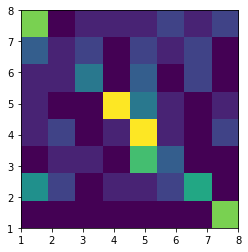

In [276]:
cmat = metrics.confusion_matrix(y_ground,y_predicted)
plot = plt.imshow(cmat,extent=[1, 8, 1, 8])

In [259]:
accuracy = 100*(correctly_classified/total)
print(accuracy)

45.87155963302752
